# Clustering con Python

In [1]:
import pandas as pd
import numpy as np

## Importar el Dataset

In [3]:
df= pd.read_csv('../../Datasets/wine/winequality-red.csv', sep= ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

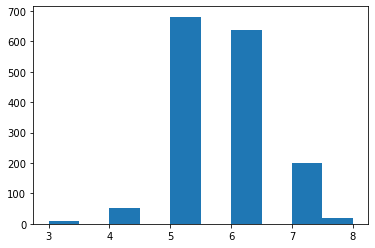

In [6]:
plt.hist(df['quality'])

In [7]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


A simple vista se podría notar lo siguiente:
* La acidez volátil es inversamente proporcional a la calidad del vino
* Así mismo los cloruros
* El ácido citrico es directamente proporcional a la calidad
* Lo mismo pasa con los sulfatos

## Normailzación de los Datos

In [9]:
df_norm= (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering Jerárquico con Scikit-Learn

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
clus= AgglomerativeClustering(n_clusters= 6, linkage= 'ward').fit(df_norm)

In [12]:
md=pd.Series(clus.labels_)

Text(0, 0.5, 'Número de Vinos del Cluster')

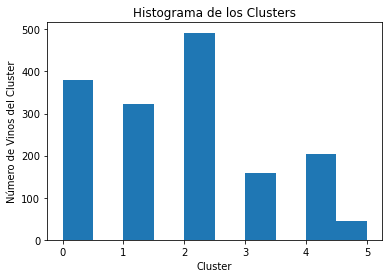

In [13]:
plt.hist(md)
plt.title('Histograma de los Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Vinos del Cluster')

In [14]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
Z= linkage(df_norm, 'ward')

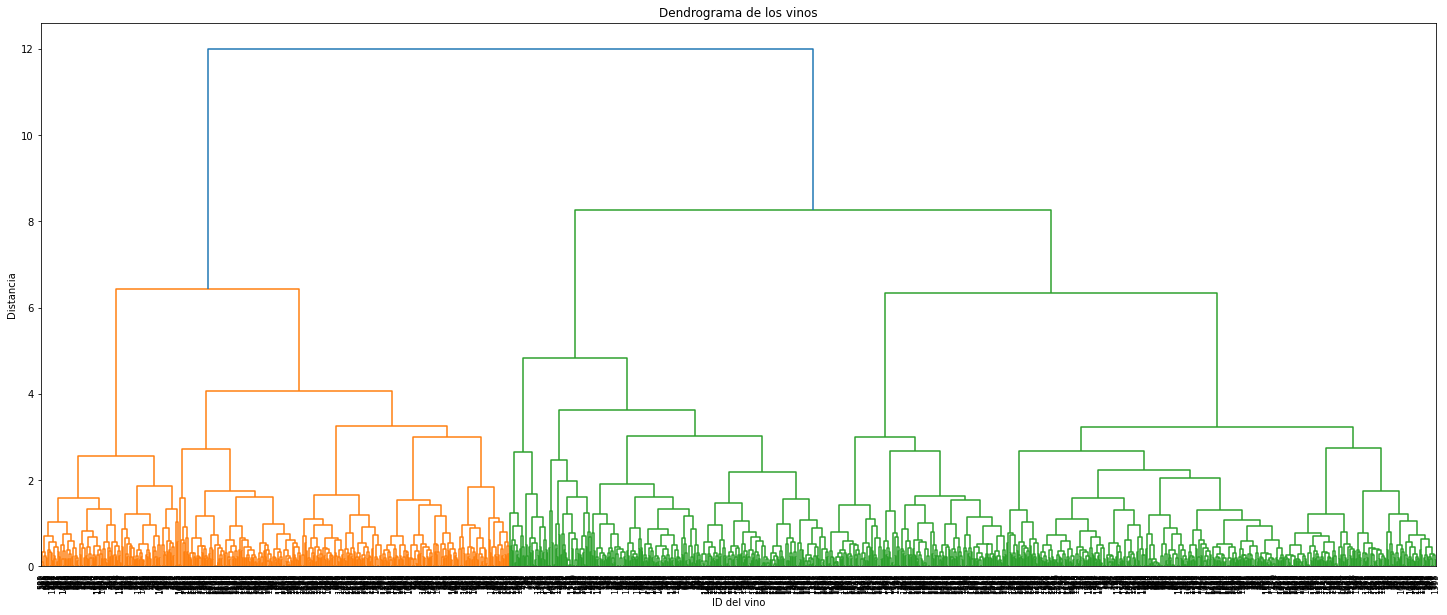

In [17]:
plt.figure(figsize= (25, 10))
plt.title('Dendrograma de los vinos')
plt.xlabel('ID del vino')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size= 8. )
plt.show()

## K-Means

In [18]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [19]:
model= KMeans(n_clusters= 6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [20]:
model.labels_

array([5, 5, 5, ..., 1, 5, 0])

In [21]:
md_k= pd.Series(model.labels_)

In [22]:
df_norm['clust_h']= md
df_norm['clust_k']= md_k
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,5


(array([231.,   0., 215.,   0., 264.,   0., 227.,   0., 297., 365.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

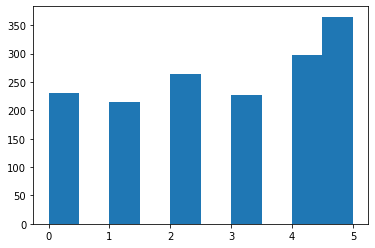

In [23]:
plt.hist(md_k)

In [24]:
model.cluster_centers_

array([[0.37118339, 0.1545247 , 0.43337662, 0.10721698, 0.1052042 ,
        0.16663618, 0.08436205, 0.40452035, 0.41183488, 0.24029862,
        0.50662671, 0.71601732],
       [0.17320436, 0.31713922, 0.09744186, 0.09337369, 0.09505765,
        0.25152309, 0.12648533, 0.31634737, 0.57722029, 0.18518312,
        0.49970185, 0.61488372],
       [0.32558997, 0.28123703, 0.30753788, 0.17009132, 0.1291673 ,
        0.40498293, 0.31375147, 0.54950385, 0.4251372 , 0.18928053,
        0.21583139, 0.45227273],
       [0.58882695, 0.20854203, 0.54519824, 0.13098184, 0.17456407,
        0.14537445, 0.09777245, 0.65508419, 0.31648687, 0.25323802,
        0.29350503, 0.54537445],
       [0.32373886, 0.26948711, 0.27599327, 0.08761127, 0.13086907,
        0.14150899, 0.12525728, 0.51605136, 0.42495824, 0.18679812,
        0.21432271, 0.4969697 ],
       [0.2399806 , 0.38669544, 0.06934247, 0.09310377, 0.12087726,
        0.16571484, 0.10888233, 0.48040754, 0.51927516, 0.1532606 ,
        0.23541974,

In [25]:
model.inertia_

188.5620582899798

## Interpretación Final

In [27]:
df_norm.groupby('clust_h').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_k
clust_h,,,,,,,,,,,,,
0,0.380858,0.171341,0.422691,0.109661,0.109928,0.178844,0.098362,0.450974,0.417198,0.226202,0.439821,0.653298,1.298153
1,0.311109,0.282598,0.299255,0.159683,0.126075,0.349926,0.283037,0.545567,0.441899,0.174080,0.203376,0.450932,2.512422
2,0.265613,0.356714,0.113557,0.091213,0.124109,0.147873,0.105073,0.486659,0.485132,0.156005,0.228685,0.455285,4.467480
3,0.644449,0.206477,0.548734,0.128576,0.124564,0.142271,0.098135,0.684780,0.301455,0.226218,0.296754,0.559494,2.949367
4,0.169313,0.344531,0.080000,0.089394,0.095731,0.253521,0.122151,0.329572,0.589432,0.182165,0.482944,0.578431,1.588235
5,0.335881,0.279577,0.405455,0.069894,0.430073,0.172535,0.184388,0.508911,0.274875,0.517148,0.171678,0.450000,3.363636
